# Pré processamento

In [2]:
# Carregar a base de dados
import pandas as pd
base_jogar_tenis = pd.read_csv("https://raw.githubusercontent.com/FelipeCarvalhoLima/Datasets/main/Jogar_Tenis.csv", sep=',', index_col=None)

In [3]:
# Observamos os registros
base_jogar_tenis

,Tempo,Temperatura,Humidade,Vento,Jogar tênis
0,Ensolarado,Quente,Alta,Fraco,Não
1,Ensolarado,Quente,Alta,Forte,Não
2,Nublado,Quente,Alta,Fraco,Sim
3,Chuvoso,Moderada,Alta,Fraco,Sim
4,Chuvoso,Agradável,Normal,Fraco,Sim
5,Chuvoso,Agradável,Normal,Forte,Não
6,Nublado,Agradável,Normal,Forte,Sim
7,Ensolarado,Moderada,Alta,Fraco,Não
8,Ensolarado,Agradável,Normal,Fraco,Sim
9,Chuvoso,Moderada,Normal,Fraco,Sim


## Separar em duas variáveis (X,y)

In [4]:
# Variável com os Previsores (X)
X_jogar_tenis = base_jogar_tenis.iloc[:,:4].values
X_jogar_tenis

array([['Ensolarado', ' Quente', ' Alta', ' Fraco'],
       ['Ensolarado', ' Quente', ' Alta', ' Forte'],
       ['Nublado', ' Quente', ' Alta', ' Fraco'],
       ['Chuvoso', ' Moderada', ' Alta', ' Fraco'],
       ['Chuvoso', ' Agradável', ' Normal', ' Fraco'],
       ['Chuvoso', ' Agradável', ' Normal', ' Forte'],
       ['Nublado', ' Agradável', ' Normal', ' Forte'],
       ['Ensolarado', ' Moderada', ' Alta', ' Fraco'],
       ['Ensolarado', ' Agradável', ' Normal', ' Fraco'],
       ['Chuvoso', ' Moderada', ' Normal', ' Fraco'],
       ['Ensolarado', ' Moderada', ' Normal', ' Forte'],
       ['Nublado', ' Moderada', ' Alta', ' Fraco'],
       ['Nublado', ' Quente', ' Normal', ' Fraco'],
       ['Chuvoso', ' Moderada', ' Alta', ' Forte']], dtype=object)

In [5]:
# Variável com a Classe (y)
y_jogar_tenis = base_jogar_tenis.iloc[:,-1].values
y_jogar_tenis

array([' Não', ' Não', ' Sim', ' Sim', ' Sim', ' Não', ' Sim', ' Não',
       ' Sim', ' Sim', ' Sim', ' Sim', ' Sim', ' Não'], dtype=object)

## Conversão dos Atributos

In [6]:
# Conversão de Atributos de Categóricos para Numéricos
from sklearn.preprocessing import LabelEncoder

# Instanciar o objeto da classe LabelEncoder por variável
label_encoder_tempo = LabelEncoder()
label_encoder_temperatura = LabelEncoder()
label_encoder_humidade = LabelEncoder()
label_encoder_vento = LabelEncoder()

In [7]:
# Aplicar o procesamento da conversão
X_jogar_tenis[:,0]=label_encoder_tempo.fit_transform(X_jogar_tenis[:,0])
X_jogar_tenis[:,1]=label_encoder_temperatura.fit_transform(X_jogar_tenis[:,1])
X_jogar_tenis[:,2]=label_encoder_humidade.fit_transform(X_jogar_tenis[:,2])
X_jogar_tenis[:,3]=label_encoder_vento.fit_transform(X_jogar_tenis[:,3])

In [8]:
X_jogar_tenis

array([[1, 2, 0, 1],
       [1, 2, 0, 0],
       [2, 2, 0, 1],
       [0, 1, 0, 1],
       [0, 0, 1, 1],
       [0, 0, 1, 0],
       [2, 0, 1, 0],
       [1, 1, 0, 1],
       [1, 0, 1, 1],
       [0, 1, 1, 1],
       [1, 1, 1, 0],
       [2, 1, 0, 1],
       [2, 2, 1, 1],
       [0, 1, 0, 0]], dtype=object)

## Salvar o arquivo .PKL

In [9]:
# Salvar/criar o arquivo com as duas variáveis
import pickle
with open('jogar_tenis.pkl', "wb") as f:
  pickle.dump([X_jogar_tenis, y_jogar_tenis], f)

# Implementar o Algoritmo -> Árvore de decisão

In [16]:
# Importar o classificador baseado em Árvore de Decisão
from sklearn.tree import DecisionTreeClassifier

In [10]:
# Abrir o arquivo .pkl
with open('/content/jogar_tenis.pkl', 'rb') as f:
  X_jogar_tenis, y_jogar_tenis = pickle.load(f)

In [11]:
# Ver a variável - previsores
X_jogar_tenis

array([[1, 2, 0, 1],
       [1, 2, 0, 0],
       [2, 2, 0, 1],
       [0, 1, 0, 1],
       [0, 0, 1, 1],
       [0, 0, 1, 0],
       [2, 0, 1, 0],
       [1, 1, 0, 1],
       [1, 0, 1, 1],
       [0, 1, 1, 1],
       [1, 1, 1, 0],
       [2, 1, 0, 1],
       [2, 2, 1, 1],
       [0, 1, 0, 0]], dtype=object)

In [12]:
# Ver a variável - classe (alto, moderado ou baixo)
y_jogar_tenis

array([' Não', ' Não', ' Sim', ' Sim', ' Sim', ' Não', ' Sim', ' Não',
       ' Sim', ' Sim', ' Sim', ' Sim', ' Sim', ' Não'], dtype=object)

## Treinar o "algoritmo <-> dados" - Gerar a árvore - Modelo!

In [17]:
# Criar a árvore de decisão
arvore_jogar_tenis = DecisionTreeClassifier(criterion='entropy')
#arvore_jogar_tenis = DecisionTreeClassifier()

#Treinamento
arvore_jogar_tenis.fit(X_jogar_tenis, y_jogar_tenis)

DecisionTreeClassifier(criterion='entropy')

In [19]:
# Qual atributo mais importante
arvore_jogar_tenis.feature_importances_

array([0.36262858, 0.15192947, 0.21123658, 0.27420537])

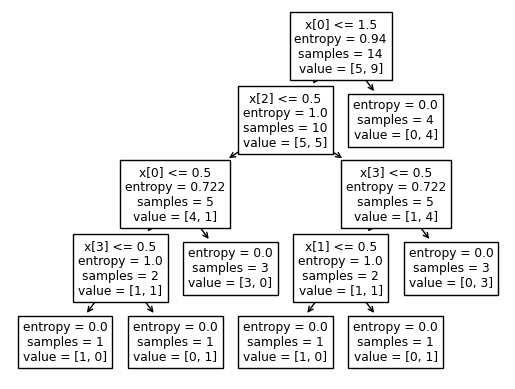

In [20]:
# Visualizar a árvore de decisão
from sklearn import tree
tree.plot_tree(arvore_jogar_tenis);

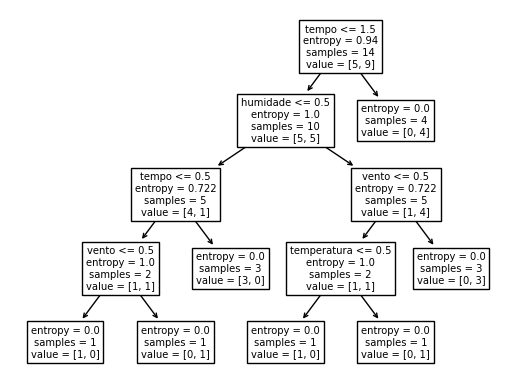

In [21]:
# Melhorar a visualização da árvore de decisão
previsores = ["tempo", "temperatura", "humidade", "vento"]
tree.plot_tree(arvore_jogar_tenis, feature_names=previsores);

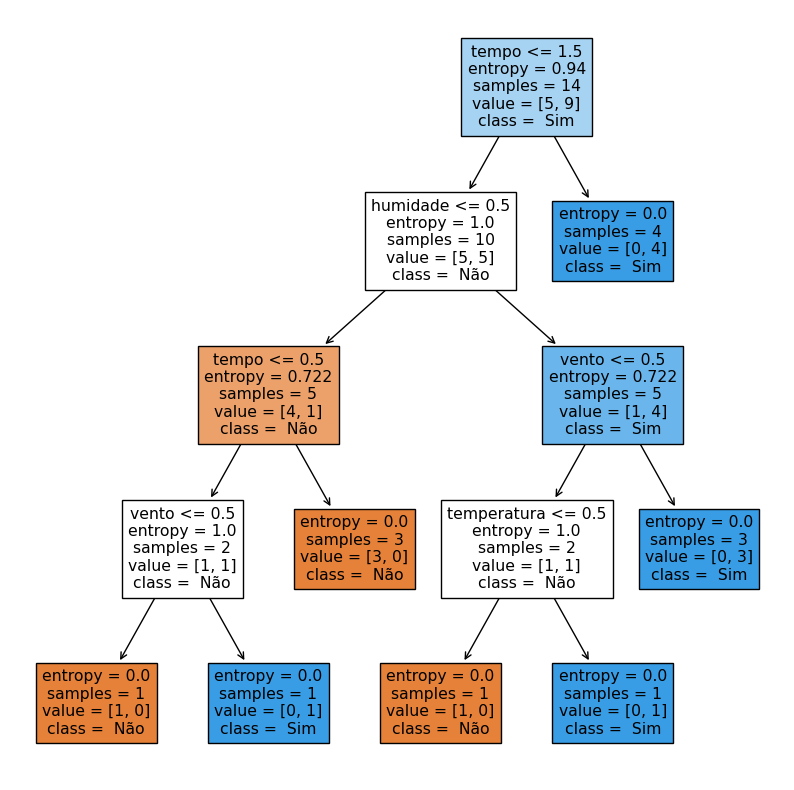

In [22]:
# Melhorar um pouco mais a visualização
import matplotlib.pyplot as plt
previsores = ["tempo", "temperatura", "humidade", "vento"]
figura, eixos = plt.subplots(nrows=1, ncols=1, figsize=[10,10])
tree.plot_tree(arvore_jogar_tenis, feature_names=previsores, class_names = arvore_jogar_tenis.classes_, filled = True);

In [23]:
#Teste!
previsoes = arvore_jogar_tenis.predict([
    [1, 1, 1, 0],
    [0, 0, 1, 1],
    [2, 2, 1, 0],
    [2, 0, 0, 0]])
#previsoes
for n in previsoes:
    print(n)

 Sim
 Sim
 Sim
 Sim
